## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)+
- Download the data of your choice.+
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.+
- Identify correlations between variables using correlation matrices and/or heatmaps.+
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Solution:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
wine_url = "../data/winequality-red.csv"

wine_df = pd.read_csv(wine_url)

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.shape

(1599, 12)

 #### Features:

    - Fixed Acidity: This refers to the total concentration of acids present in the wine. Acids are important for the taste and stability of the wine.
    - Volatile Acidity: This measures the amount of volatile acids in the wine, which can contribute to off-flavors and aromas if present in excess.
    - Citric Acid: This is one of the fixed acids and contributes to the overall acidity of the wine. It also adds a citrusy flavor.
    - Residual Sugar: This is the amount of sugar remaining in the wine after fermentation. Wines can be dry (very little residual sugar) or sweet (higher residual sugar).
    - Chlorides: The concentration of salt in the wine, which can affect its taste.
    - Free Sulfur Dioxide: Sulfur dioxide is used in winemaking as a preservative and antioxidant. The free form is the portion that is not bound to other compounds.
    - Total Sulfur Dioxide: This is the total amount of sulfur dioxide in the wine, including both the free and bound forms.
    - Density: The density of the wine, which is related to its alcohol content and sugar content.
    - pH: This measures how acidic or basic the wine. Most wines are between 3-4 
    - Sulphates: These are compounds containing sulfur, often added to wine as a preservative.
    - Alcohol: The percentage of alcohol in the wine.
    - Quality (Output Variable): This is a subjective score given to the wine based on sensory data. It ranges from 0 to 10. Score between 3 and 8.


### Data Analysis

In [6]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.duplicated().sum()

240

In [8]:
wine_df.drop_duplicates(inplace=True)

In [9]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [10]:
wine_df["quality"].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [11]:
wine_df['residual sugar'].value_counts()

residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64

In [12]:
quality6_wine = wine_df[(wine_df["quality"] == 5) | (wine_df["quality"] == 6) & (wine_df['residual sugar']>50)]

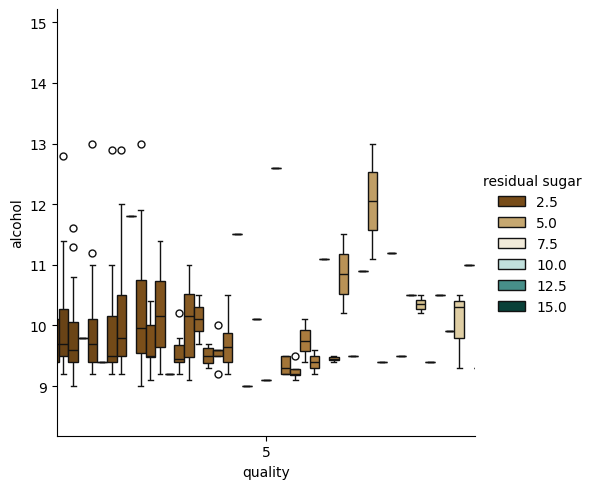

In [13]:
sns.catplot(data=quality6_wine,
            x='quality', 
            y='alcohol',
            hue='residual sugar',
            palette="BrBG",
            kind="box",
            width=1.5)
plt.show()

### Visualizing Distributions of Data

In [14]:
#bins divided 3 range such as  -∞ to 4, 4 to 6 ve 6 to +∞ 
wine_df["Quality_Range"] = pd.cut(wine_df["quality"], 
                                 bins=[-np.inf, 4, 6, np.inf], 
                                 labels=["3-4","5-6","7-8"])

In [15]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality_Range
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5-6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5-6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5-6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5-6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5-6


In [16]:
check_wine=wine_df.drop(['quality','Quality_Range'],axis=1)

In [17]:
check_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


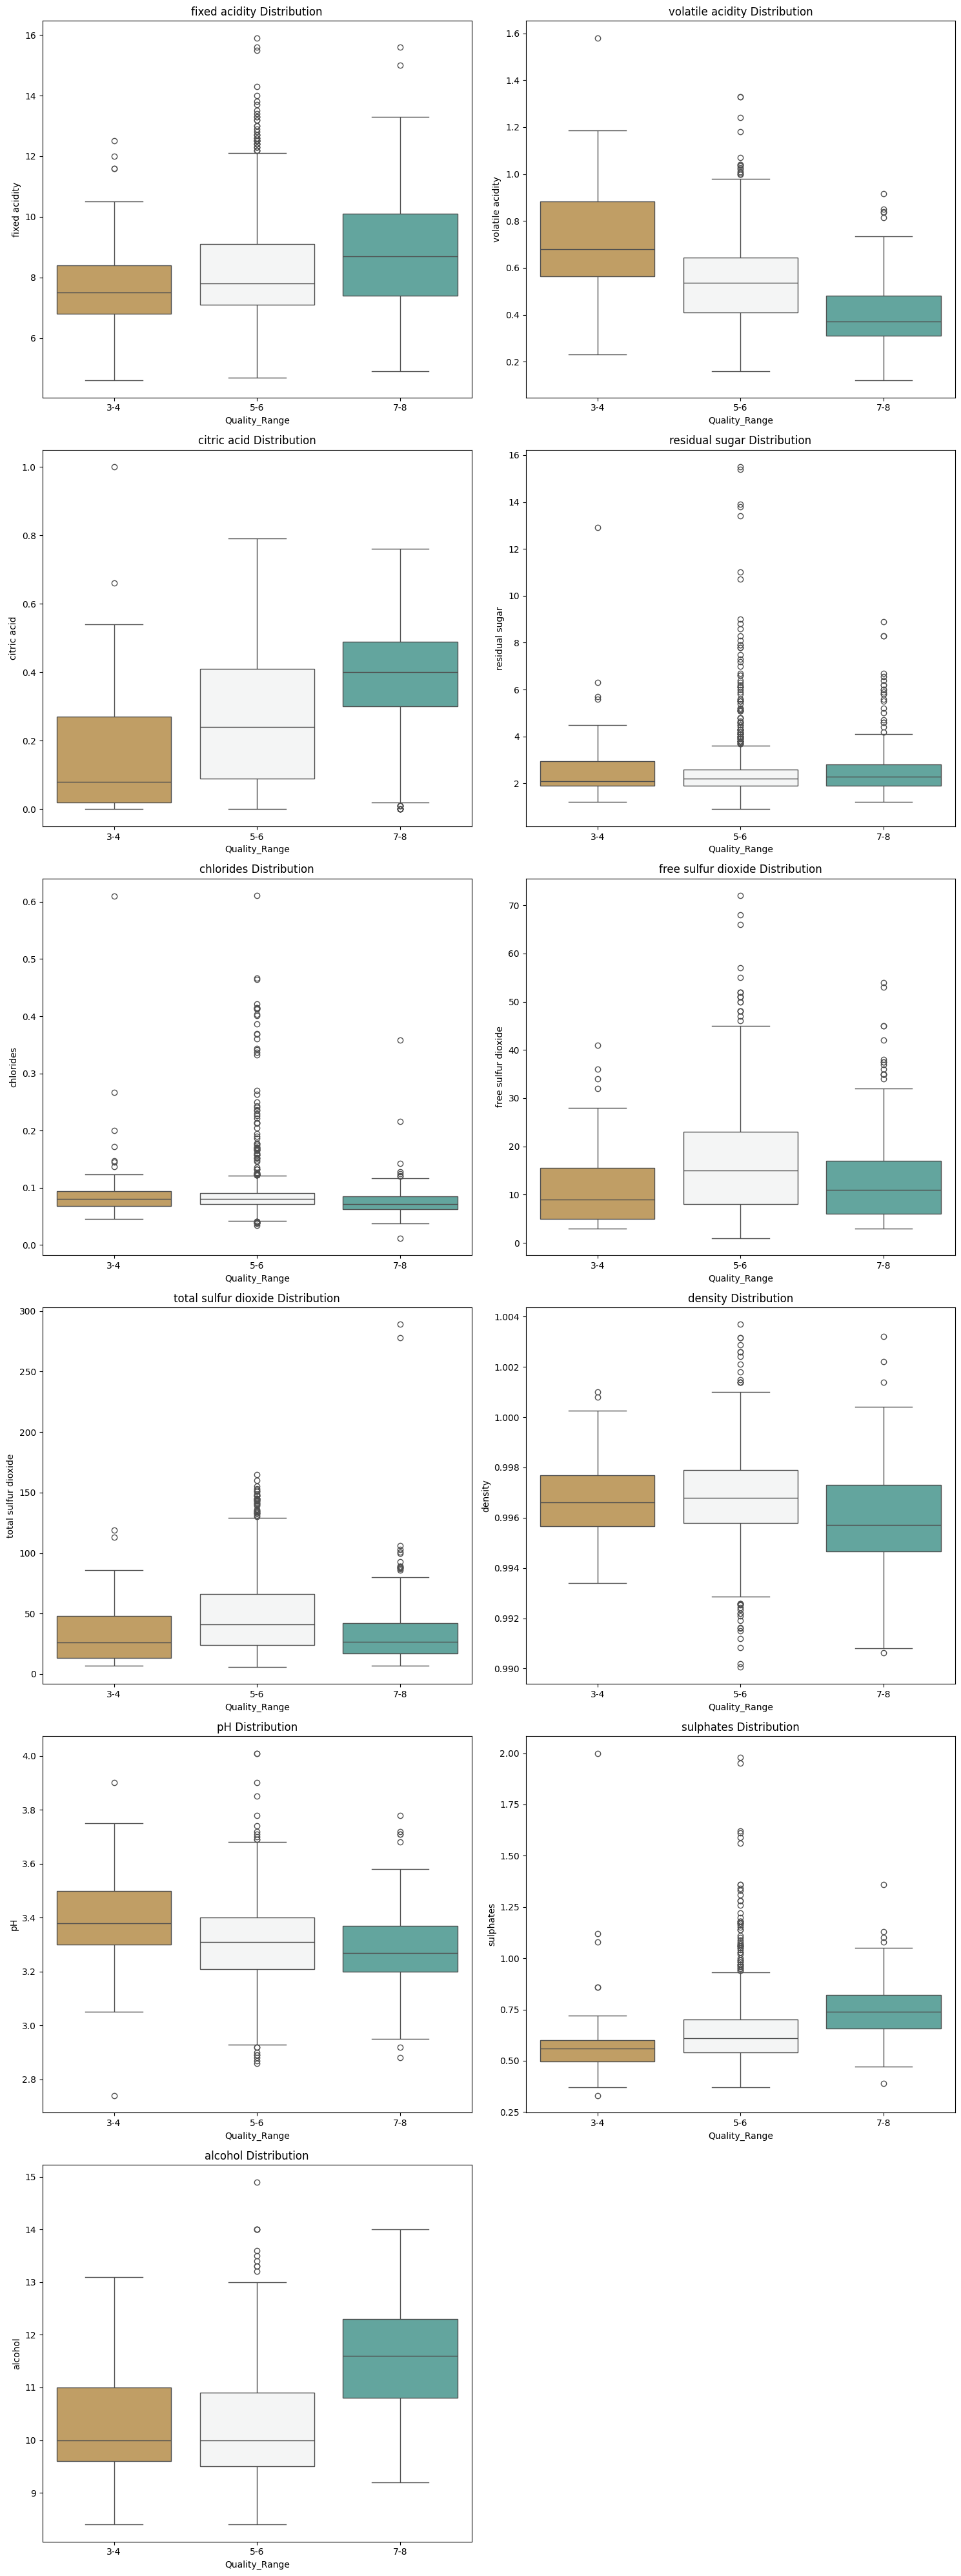

In [18]:
#plt.subplot(nrows, ncols, index)
plt.figure(figsize=(15,40))
for idx,column in enumerate(check_wine.columns):
    plt.subplot(len(check_wine.columns)//2+1,2,idx+1)
    sns.boxplot(data=wine_df, 
                x="Quality_Range",
                y=column, 
                hue="Quality_Range",
                palette="BrBG")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

plt.show()

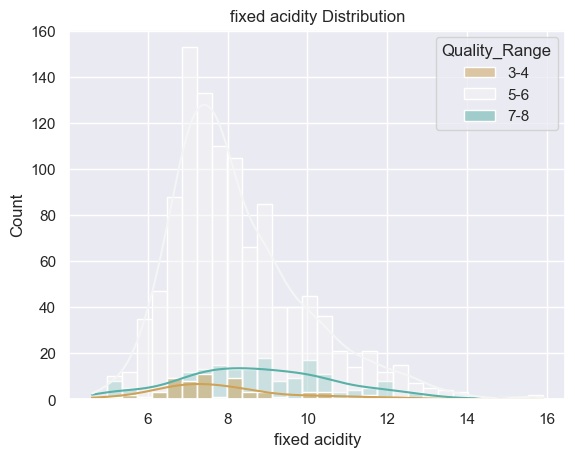

In [19]:
sns.set(style="darkgrid")
sns.histplot(data=wine_df,
             x="fixed acidity",
             hue="Quality_Range",
             palette="BrBG",
             kde=True
             )

plt.title("fixed acidity Distribution")
plt.show()

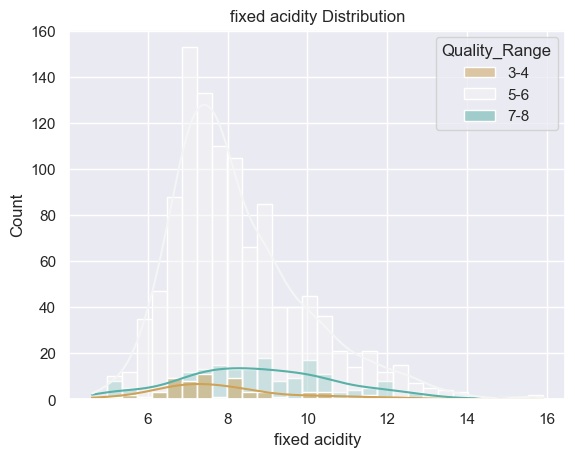

In [20]:
sns.set(style="darkgrid")
sns.histplot(data=wine_df,
             x="fixed acidity",
             hue="Quality_Range",
             bins=30,
             palette="BrBG",
             kde=True
             )

plt.title("fixed acidity Distribution")
plt.show()

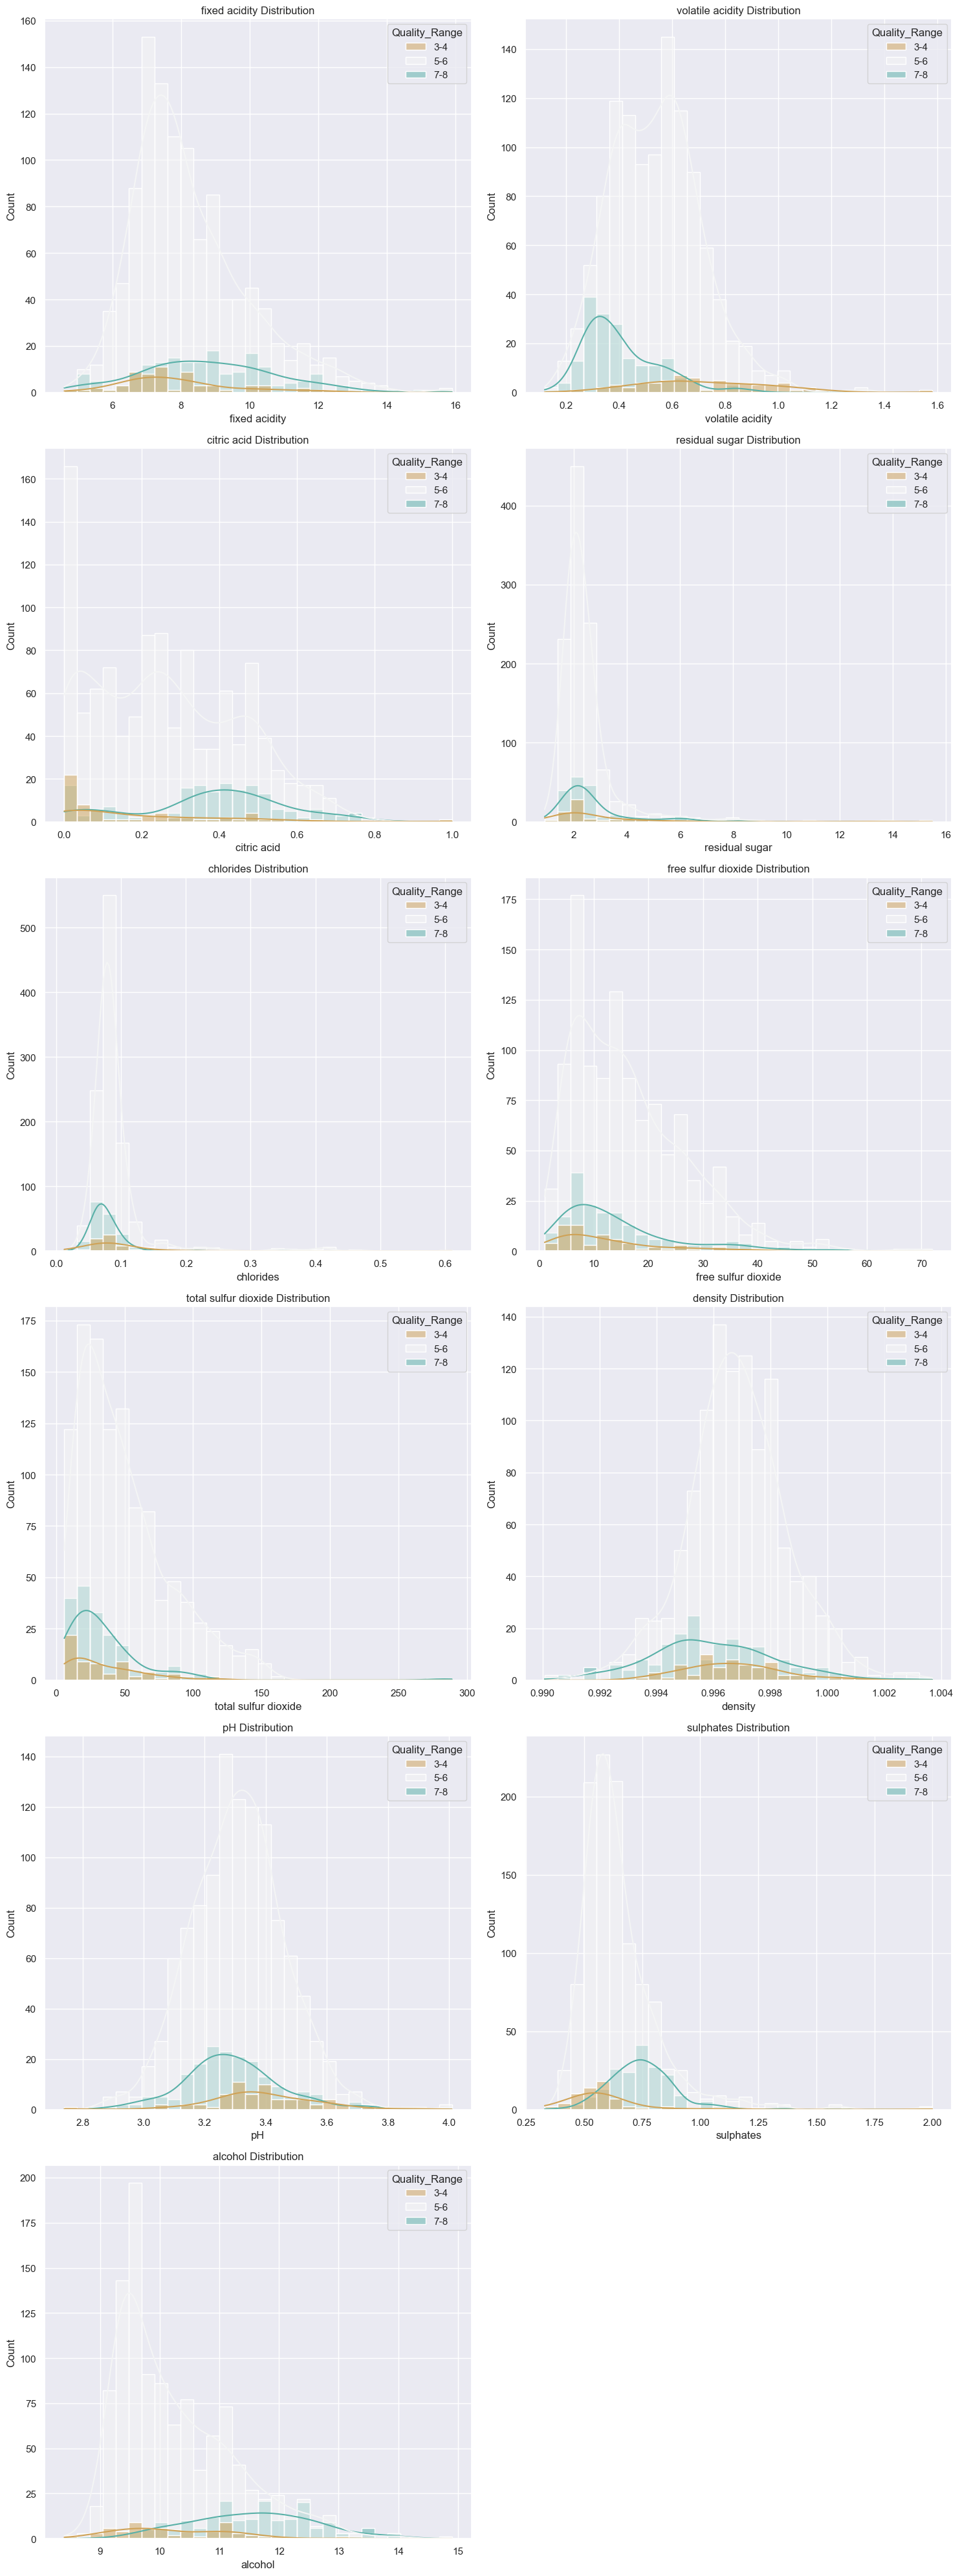

In [21]:
plt.figure(figsize=(15,40))
for idx,column in enumerate(check_wine.columns):
    plt.subplot(len(check_wine.columns)//2+1,2,idx+1)
    sns.histplot(data=wine_df,
                 x=column, 
                 hue="Quality_Range", 
                 bins=30,
                 palette="BrBG",
                 kde=True,)
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

#### Correlation

-Correlation coefficients are interpreted

    1: Full positive correlation
    0: No correlation
    -1: Complete negative correlation

In [23]:
wine_df=wine_df.drop(['Quality_Range'],axis=1)

In [24]:
# Calculate Coefficient of Pearson Correlation 
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [25]:
# Calculate Coefficient of Spearman Rank Correlation 
wine_df.corr(method='spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.111693
volatile acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.387450
citric acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.219427
residual sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.025749
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.204360
free sulfur dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.058746
total sulfur dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.196620
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.184302
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.042738
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.380581


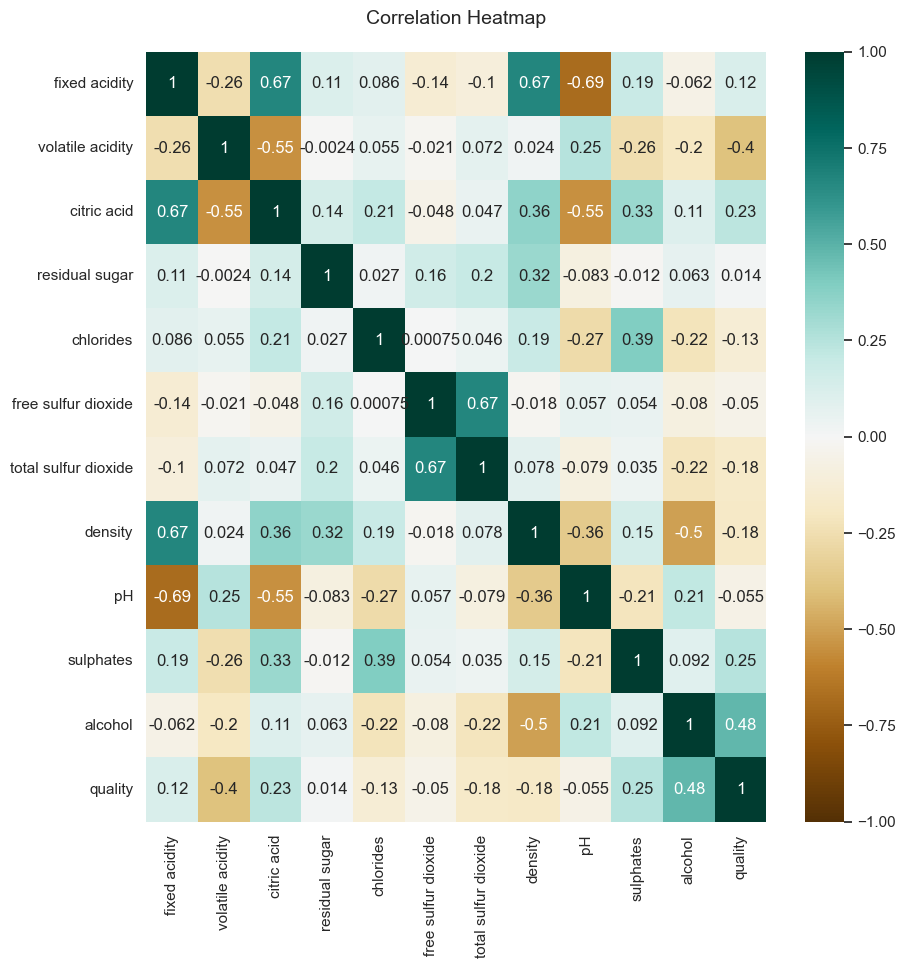

In [30]:
#annot=True represent the cell values with text
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(wine_df.corr(), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Correlation Heatmap', 
                  fontdict={'fontsize':14}, 
                  pad=20)
plt.show()

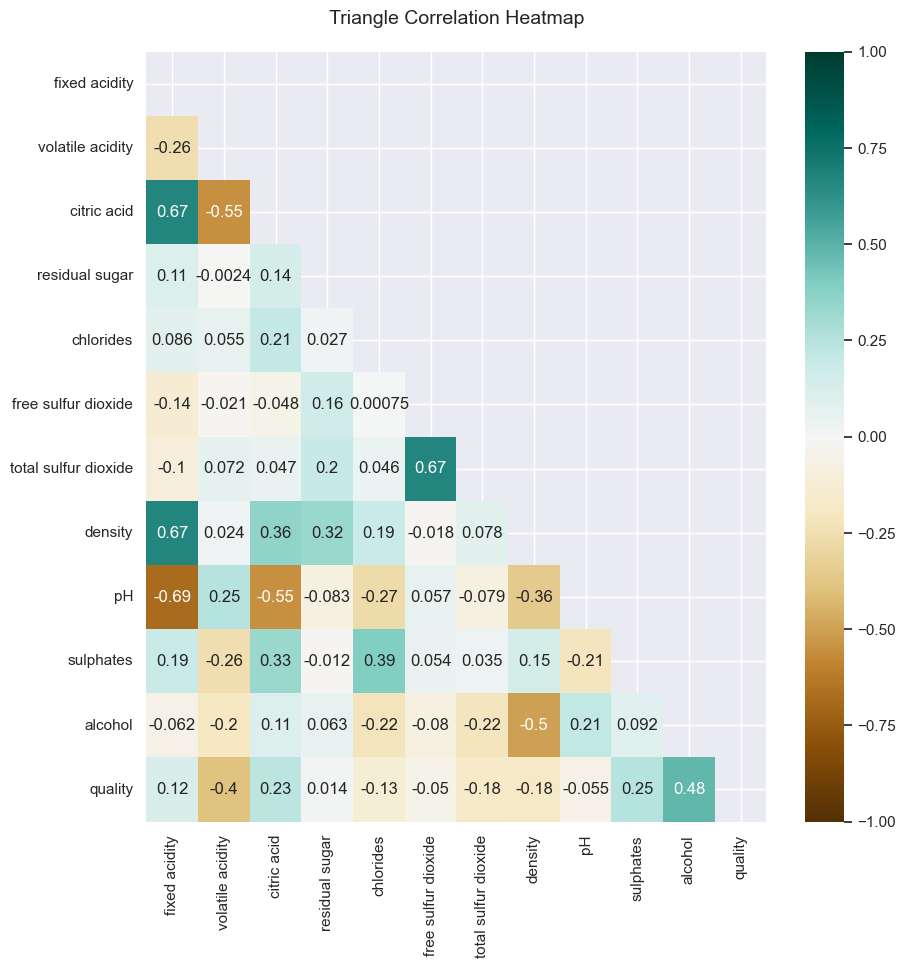

In [31]:
plt.figure(figsize=(10,10))
triangle_mask = np.triu(np.ones_like(wine_df.corr()))
heatmap = sns.heatmap(wine_df.corr(), 
                      mask=triangle_mask, 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', 
                  fontdict={'fontsize':14}, 
                  pad=20)
plt.show()